In [177]:
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import statistics as st
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.manifold import TSNE
from matplotlib.ticker import NullFormatter

In [ ]:
data = pd.read_csv('joinedData_assessmentStudentAssessor3_clean Anonymized.csv')

In [ ]:
pd.set_option('display.max_columns', 600)

### Some more EDA

In [ ]:
data.groupby(['StudentId']).count()['AssessmentId']

StudentId
V1_0        2
V1_1        2
V1_10       2
V1_100      5
V1_1000    10
           ..
V1_995      5
V1_996      4
V1_997      2
V1_998      5
V1_999      2
Name: AssessmentId, Length: 7269, dtype: int64

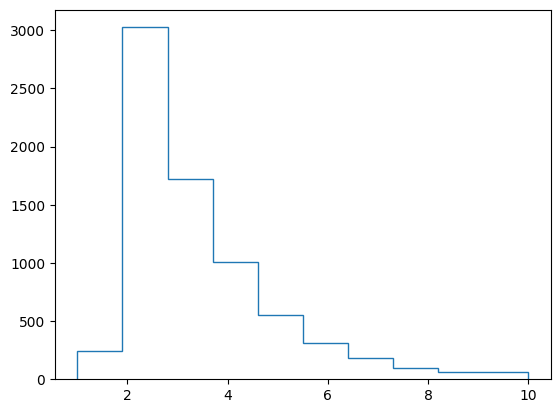

In [ ]:
counts, bins = np.histogram(data.groupby(['StudentId']).count()['AssessmentId'])
plt.stairs(counts, bins)
plt.show()

## Data Preparation

In [ ]:
skills = pd.read_csv('skills.csv')['0']

In [147]:
non_skill_useful_features = ['FirstAssessment_byStudent', 'StudentAgeAtAssesment', 'IsMale', 'Log[DurationAssessment]']
ids = ['StudentId', 'AssessmentId']
useful_features = ids + list(skills) + non_skill_useful_features

 Note that 1381 rows don't have Age and 374 rows don't have Gender.
 We drop them to proceed. Other ways like imputation can also be explored.

In [61]:
useful_data = data[useful_features].dropna()


In [36]:
percent_data_dropped = (len(data) - len(useful_data))/len(data)
percent_data_dropped*100

9.28320630298878

## Problem 1 : Group students based on progress over the assessment

### Feature Engineering

In [119]:
skill_areas = list(string.ascii_uppercase)
skill_areas.remove('O')
progress_over_assessment_data = pd.DataFrame()

In [123]:
for skill_area in skill_areas:
  print("#########  SKILL AREA : " + skill_area)
  tests_by_skill_area = [x for x in skills if skill_area in x]
  data = useful_data[tests_by_skill_area]
  consistently_zero = data.apply(lambda x: (x == np.zeros(len(x))).all(), axis=1)
  progress_over_assessment_data[skill_area + '_is_consistently_min'] = consistently_zero.astype(int)
  progress_over_assessment_data[skill_area + '_max_score'] = data.apply(max, axis=1)
  progress = (data + 1).apply(lambda x: list(x.pct_change().dropna()), axis=1)
  progress_over_assessment_data[skill_area + '_progress_mean'] = progress.apply(np.mean)
  progress_over_assessment_data[skill_area + '_progress_max'] = progress.apply(np.max)
  progress_over_assessment_data[skill_area + '_progress_speed'] = progress.apply(lambda x: list(pd.Series(x).diff().dropna())).apply(np.mean)
  progress_over_assessment_data[skill_area + '_q10_score'] = data.apply(lambda x: np.percentile(x,10), axis=1)
  progress_over_assessment_data[skill_area + '_q90_score'] = data.apply(lambda x: np.percentile(x,90), axis=1)
  progress_over_assessment_data[skill_area + '_q50_score'] = data.apply(lambda x: np.median(x), axis=1)
  progress_over_assessment_data[skill_area + '_mode_score'] = data.apply(lambda x: st.mode(x), axis=1)
  progress_over_assessment_data[skill_area + '_mean_score'] = data.apply(lambda x: np.mean(x), axis=1)
  progress_over_assessment_data[skill_area + '_min_score'] = data.apply(lambda x: np.min(x), axis=1)
  progress_over_assessment_data[skill_area + '_range'] = progress_over_assessment_data[skill_area + '_max_score'] - progress_over_assessment_data[skill_area + '_min_score']
  levels = data.apply(lambda x: [1 if i > 0 else 0 for i in x], axis=1)
  max_levels = levels.apply(lambda x: len(x) - np.argmax(x[::-1]) -1)
  max_levels[consistently_zero] = 0
  progress_over_assessment_data[skill_area + '_max_level_reached'] = max_levels
  print("done")

#########  SKILL AREA : A
done
#########  SKILL AREA : B
done
#########  SKILL AREA : C
done
#########  SKILL AREA : D
done
#########  SKILL AREA : E
done
#########  SKILL AREA : F
done
#########  SKILL AREA : G
done
#########  SKILL AREA : H
done
#########  SKILL AREA : I
done
#########  SKILL AREA : J
done
#########  SKILL AREA : K
done
#########  SKILL AREA : L
done
#########  SKILL AREA : M
done
#########  SKILL AREA : N
done
#########  SKILL AREA : P
done
#########  SKILL AREA : Q
done
#########  SKILL AREA : R
done
#########  SKILL AREA : S
done
#########  SKILL AREA : T
done
#########  SKILL AREA : U
done
#########  SKILL AREA : V
done
#########  SKILL AREA : W
done
#########  SKILL AREA : X
done
#########  SKILL AREA : Y
done
#########  SKILL AREA : Z
done


In [121]:
progress_over_assessment_data['StudentId'] = useful_data['StudentId']
progress_over_assessment_data['AssessmentId'] = useful_data['AssessmentId']

<ipython-input-121-94fbf9dbea85>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  progress_over_assessment_data['StudentId'] = useful_data['StudentId']
<ipython-input-121-94fbf9dbea85>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  progress_over_assessment_data['AssessmentId'] = useful_data['AssessmentId']


In [126]:
progress_over_assessment_data.to_csv('Progress over assessment data.csv')

### PCA

0.44506025375760927
0.49755961780884106
0.5450104224072797
0.5769385811072899
0.603381250090181
0.6209187991309466
0.6361129558796565
0.6500703010959369
0.6636403276321318
0.6760951668797083
0.6871490267766768
0.6976502520580098
0.7065811174593326
0.7147472157454761
0.7227059630686097
0.7303834846221509
0.7376619719829378
0.7448736669156621
0.751362845032125
0.7575792978220439
0.7635547335425946
0.7690966485609103
0.7744278394229949
0.7797162363886363
0.7847460939440369
0.7896677697720079
0.7944310652632111
0.7990180524214217
0.8035607733070418
0.8078545098272123
0.8121800354270183
0.8158177357983122
0.819799319238093
0.8236013362068733
0.8274807139121397
0.831151142779933
0.8347417879367096
0.8380269427380543
0.8415446367211186
0.8447404406154007
0.8480539094347679
0.851098055302238
0.8541789562302012
0.857102805637552
0.8600421079060964
0.8628803892193979
0.8654323082415804
0.8682086746738924
0.8706231751809119
0.8731350661270243
0.8753268964986668
0.8775930824814728
0.87960736514053

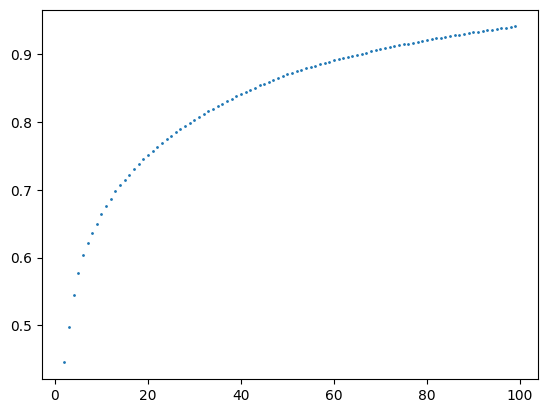

In [130]:
pca_data = progress_over_assessment_data.drop(['StudentId', 'AssessmentId'], axis=1)
min_max_scaler = MinMaxScaler()
pca_data = min_max_scaler.fit_transform(pca_data)

components_to_try = list(range(2, 100))
explained_variance = []

for component in components_to_try:
  pca = PCA(n_components=component)
  pca.fit(pca_data)
  explained_variance.append(pca.explained_variance_ratio_.sum())
  print(pca.explained_variance_ratio_.sum())
plt.scatter(components_to_try, explained_variance, s=1)
plt.show()

### Clustering

In [131]:
# We use PCA to reduce the data to 100 components
data_to_cluster = pca.fit_transform(pca_data)
data_to_cluster = pd.DataFrame(data_to_cluster)

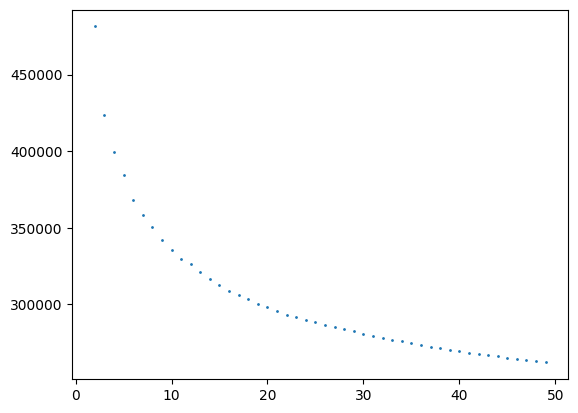

In [135]:
clusters_to_try = list(range(2,50))
inertias = []

for cluster in clusters_to_try:
  kmeans = KMeans(n_clusters=cluster, random_state=67, n_init="auto")
  kmeans.fit(data_to_cluster)
  inertias.append(kmeans.inertia_)

plt.scatter(clusters_to_try, inertias, s=1)

In [136]:
# It seems like the ideal no. of clusters following the Elbow method is 15

kmeans = KMeans(n_clusters=15, random_state=67, n_init="auto")
kmeans.fit(data_to_cluster)
clusters = kmeans.labels_

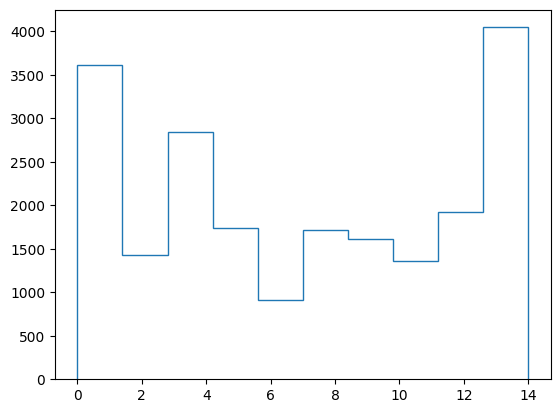

In [138]:
counts, bins = np.histogram(clusters)
plt.stairs(counts, bins)
plt.show()

In [139]:
# Save clustering results
cluster_results = pd.DataFrame()
cluster_results['AssessmentId'] = progress_over_assessment_data['AssessmentId']
cluster_results['StudentId'] = progress_over_assessment_data['StudentId']
cluster_results['Cluster'] = clusters
cluster_results.to_csv('Progress over assessment cluster results.csv')

### Cluster Profiling

Did not pursue due to the constraint of time

## Problem 2 : Group student based on student's progress over time

### Unfortunately we didn't have the time to pursue this problem

## Validation with Normative data

In [143]:
# Read test data
test_data = pd.read_csv('examplesNeuroTypical_ABLLSR.csv')

In [150]:
useful_features_test_data = useful_features[:]
useful_features_test_data.remove('Log[DurationAssessment]')
useful_features_test_data.remove('IsMale')

useful_features_train_data = useful_features[:]
useful_features_train_data.remove('Log[DurationAssessment]')
useful_features_train_data.remove('IsMale')

test_data = test_data[useful_features_test_data]

In [151]:
test_data_progress = pd.DataFrame()

for skill_area in skill_areas:
  print("#########  SKILL AREA : " + skill_area)
  tests_by_skill_area = [x for x in skills if skill_area in x]
  data = test_data[tests_by_skill_area]
  consistently_zero = data.apply(lambda x: (x == np.zeros(len(x))).all(), axis=1)
  test_data_progress[skill_area + '_is_consistently_min'] = consistently_zero.astype(int)
  test_data_progress[skill_area + '_max_score'] = data.apply(max, axis=1)
  progress = (data + 1).apply(lambda x: list(x.pct_change().dropna()), axis=1)
  test_data_progress[skill_area + '_progress_mean'] = progress.apply(np.mean)
  test_data_progress[skill_area + '_progress_max'] = progress.apply(np.max)
  test_data_progress[skill_area + '_progress_speed'] = progress.apply(lambda x: list(pd.Series(x).diff().dropna())).apply(np.mean)
  test_data_progress[skill_area + '_q10_score'] = data.apply(lambda x: np.percentile(x,10), axis=1)
  test_data_progress[skill_area + '_q90_score'] = data.apply(lambda x: np.percentile(x,90), axis=1)
  test_data_progress[skill_area + '_q50_score'] = data.apply(lambda x: np.median(x), axis=1)
  test_data_progress[skill_area + '_mode_score'] = data.apply(lambda x: st.mode(x), axis=1)
  test_data_progress[skill_area + '_mean_score'] = data.apply(lambda x: np.mean(x), axis=1)
  test_data_progress[skill_area + '_min_score'] = data.apply(lambda x: np.min(x), axis=1)
  test_data_progress[skill_area + '_range'] = test_data_progress[skill_area + '_max_score'] - test_data_progress[skill_area + '_min_score']
  levels = data.apply(lambda x: [1 if i > 0 else 0 for i in x], axis=1)
  max_levels = levels.apply(lambda x: len(x) - np.argmax(x[::-1]) -1)
  max_levels[consistently_zero] = 0
  test_data_progress[skill_area + '_max_level_reached'] = max_levels
  print("done")

#########  SKILL AREA : A
done
#########  SKILL AREA : B
done
#########  SKILL AREA : C
done
#########  SKILL AREA : D
done
#########  SKILL AREA : E
done
#########  SKILL AREA : F
done
#########  SKILL AREA : G
done
#########  SKILL AREA : H


<ipython-input-151-973a02ff1e2d>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_data_progress[skill_area + '_mean_score'] = data.apply(lambda x: np.mean(x), axis=1)
<ipython-input-151-973a02ff1e2d>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_data_progress[skill_area + '_min_score'] = data.apply(lambda x: np.min(x), axis=1)
<ipython-input-151-973a02ff1e2d>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consid

done
#########  SKILL AREA : I


<ipython-input-151-973a02ff1e2d>:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_data_progress[skill_area + '_progress_mean'] = progress.apply(np.mean)
<ipython-input-151-973a02ff1e2d>:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_data_progress[skill_area + '_progress_max'] = progress.apply(np.max)
<ipython-input-151-973a02ff1e2d>:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at on

done
#########  SKILL AREA : J


<ipython-input-151-973a02ff1e2d>:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_data_progress[skill_area + '_is_consistently_min'] = consistently_zero.astype(int)
<ipython-input-151-973a02ff1e2d>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_data_progress[skill_area + '_max_score'] = data.apply(max, axis=1)
<ipython-input-151-973a02ff1e2d>:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all colum

done
#########  SKILL AREA : K


<ipython-input-151-973a02ff1e2d>:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_data_progress[skill_area + '_is_consistently_min'] = consistently_zero.astype(int)
<ipython-input-151-973a02ff1e2d>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_data_progress[skill_area + '_max_score'] = data.apply(max, axis=1)
<ipython-input-151-973a02ff1e2d>:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all colum

done
#########  SKILL AREA : L


<ipython-input-151-973a02ff1e2d>:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_data_progress[skill_area + '_progress_mean'] = progress.apply(np.mean)
<ipython-input-151-973a02ff1e2d>:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_data_progress[skill_area + '_progress_max'] = progress.apply(np.max)
<ipython-input-151-973a02ff1e2d>:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at on

done
#########  SKILL AREA : M


<ipython-input-151-973a02ff1e2d>:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_data_progress[skill_area + '_progress_mean'] = progress.apply(np.mean)
<ipython-input-151-973a02ff1e2d>:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_data_progress[skill_area + '_progress_max'] = progress.apply(np.max)
<ipython-input-151-973a02ff1e2d>:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at on

done
#########  SKILL AREA : N


<ipython-input-151-973a02ff1e2d>:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_data_progress[skill_area + '_progress_mean'] = progress.apply(np.mean)
<ipython-input-151-973a02ff1e2d>:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_data_progress[skill_area + '_progress_max'] = progress.apply(np.max)
<ipython-input-151-973a02ff1e2d>:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at on

done
#########  SKILL AREA : P


<ipython-input-151-973a02ff1e2d>:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_data_progress[skill_area + '_progress_mean'] = progress.apply(np.mean)
<ipython-input-151-973a02ff1e2d>:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_data_progress[skill_area + '_progress_max'] = progress.apply(np.max)
<ipython-input-151-973a02ff1e2d>:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at on

done
#########  SKILL AREA : Q


<ipython-input-151-973a02ff1e2d>:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_data_progress[skill_area + '_progress_mean'] = progress.apply(np.mean)
<ipython-input-151-973a02ff1e2d>:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_data_progress[skill_area + '_progress_max'] = progress.apply(np.max)
<ipython-input-151-973a02ff1e2d>:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at on

done
#########  SKILL AREA : R


<ipython-input-151-973a02ff1e2d>:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_data_progress[skill_area + '_progress_mean'] = progress.apply(np.mean)
<ipython-input-151-973a02ff1e2d>:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_data_progress[skill_area + '_progress_max'] = progress.apply(np.max)
<ipython-input-151-973a02ff1e2d>:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at on

done
#########  SKILL AREA : S


<ipython-input-151-973a02ff1e2d>:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_data_progress[skill_area + '_progress_mean'] = progress.apply(np.mean)
<ipython-input-151-973a02ff1e2d>:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_data_progress[skill_area + '_progress_max'] = progress.apply(np.max)
<ipython-input-151-973a02ff1e2d>:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at on

done
#########  SKILL AREA : T


<ipython-input-151-973a02ff1e2d>:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_data_progress[skill_area + '_progress_mean'] = progress.apply(np.mean)
<ipython-input-151-973a02ff1e2d>:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_data_progress[skill_area + '_progress_max'] = progress.apply(np.max)
<ipython-input-151-973a02ff1e2d>:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at on

done
#########  SKILL AREA : U


<ipython-input-151-973a02ff1e2d>:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_data_progress[skill_area + '_is_consistently_min'] = consistently_zero.astype(int)
<ipython-input-151-973a02ff1e2d>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_data_progress[skill_area + '_max_score'] = data.apply(max, axis=1)
<ipython-input-151-973a02ff1e2d>:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all colum

done
#########  SKILL AREA : V


<ipython-input-151-973a02ff1e2d>:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_data_progress[skill_area + '_is_consistently_min'] = consistently_zero.astype(int)
<ipython-input-151-973a02ff1e2d>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_data_progress[skill_area + '_max_score'] = data.apply(max, axis=1)
<ipython-input-151-973a02ff1e2d>:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all colum

done
#########  SKILL AREA : W


<ipython-input-151-973a02ff1e2d>:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_data_progress[skill_area + '_is_consistently_min'] = consistently_zero.astype(int)
<ipython-input-151-973a02ff1e2d>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_data_progress[skill_area + '_max_score'] = data.apply(max, axis=1)
<ipython-input-151-973a02ff1e2d>:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all colum

done
#########  SKILL AREA : X


<ipython-input-151-973a02ff1e2d>:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_data_progress[skill_area + '_is_consistently_min'] = consistently_zero.astype(int)
<ipython-input-151-973a02ff1e2d>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_data_progress[skill_area + '_max_score'] = data.apply(max, axis=1)
<ipython-input-151-973a02ff1e2d>:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all colum

done
#########  SKILL AREA : Y


<ipython-input-151-973a02ff1e2d>:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_data_progress[skill_area + '_progress_mean'] = progress.apply(np.mean)
<ipython-input-151-973a02ff1e2d>:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_data_progress[skill_area + '_progress_max'] = progress.apply(np.max)
<ipython-input-151-973a02ff1e2d>:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at on

done
#########  SKILL AREA : Z


<ipython-input-151-973a02ff1e2d>:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_data_progress[skill_area + '_progress_mean'] = progress.apply(np.mean)
<ipython-input-151-973a02ff1e2d>:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_data_progress[skill_area + '_progress_max'] = progress.apply(np.max)
<ipython-input-151-973a02ff1e2d>:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at on

done


<ipython-input-151-973a02ff1e2d>:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_data_progress[skill_area + '_q50_score'] = data.apply(lambda x: np.median(x), axis=1)
<ipython-input-151-973a02ff1e2d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_data_progress[skill_area + '_mode_score'] = data.apply(lambda x: st.mode(x), axis=1)
<ipython-input-151-973a02ff1e2d>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

In [166]:
pca_data_test = test_data_progress
min_max_scaler = MinMaxScaler()
pca_data_test = min_max_scaler.fit_transform(pca_data_test)

pca_test = PCA(n_components=99)
pca_test.fit(pca_data_test)
pca_data_test = pca_test.fit_transform(pca_data_test)
pca_data_test = pd.DataFrame(pca_data_test)

In [173]:
pca_data_test['labels'] = np.ones(pca_data_test.shape[0]) * 15
data_to_cluster['labels'] = np.zeros(data_to_cluster.shape[0])

In [174]:
total_data = data_to_cluster.append(pca_data_test, ignore_index=True)

<ipython-input-174-ef22167b0330>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_data = data_to_cluster.append(pca_data_test, ignore_index=True)


In [180]:
# Visualizing with t-SNE

X = total_data.iloc[:,:-1]
y = total_data['labels']

red = y == 0
green = y == 15

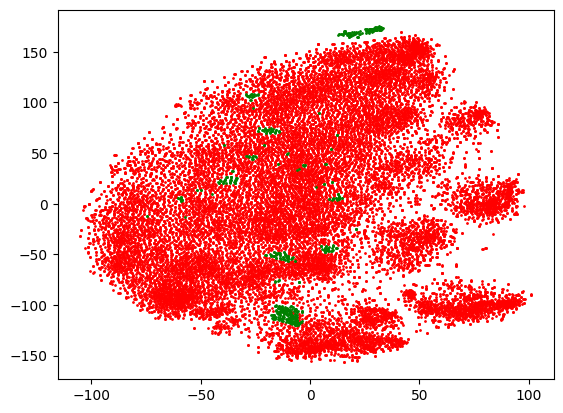

In [184]:
perplexity = 100
iterations = 5000

tsne = TSNE(
        n_components=2,
        init="random",
        random_state=0,
        perplexity=perplexity,
        n_iter=iterations,
    )
Y = tsne.fit_transform(X)

print("Model executed")

plt.scatter(Y[red, 0], Y[red, 1], c="r", s=1)
plt.scatter(Y[green, 0], Y[green, 1], c="g", s=1)
plt.axis("tight")

plt.show()

In [185]:
pca_data_test['labels'] = np.ones(pca_data_test.shape[0]) * 15
data_to_cluster['labels'] = clusters

total_data = data_to_cluster.append(pca_data_test, ignore_index=True)

# Visualizing with t-SNE

# X = total_data.iloc[:,:-1]
y = total_data['labels']

<ipython-input-185-8768105b8499>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_data = data_to_cluster.append(pca_data_test, ignore_index=True)


In [186]:
red = y == 0
blue = y == 1
yellow = y == 2
cyan = y == 3
magenta = y == 4
black = y == 5
aquamarine = y == 6
mediumseagreen = y == 7
eggshell = y == 8
orange = y == 9
purple = y == 10
brown = y == 11
pink = y == 12
gray = y == 13
olive = y == 14
green = y == 15

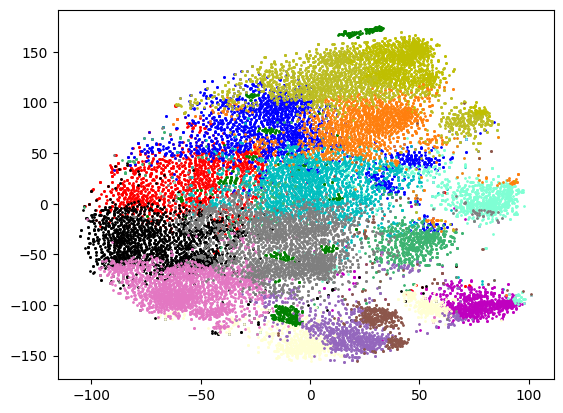

In [189]:
plt.scatter(Y[red, 0], Y[red, 1], c="r", s=1)
plt.scatter(Y[green, 0], Y[green, 1], c="g", s=1)
plt.scatter(Y[blue, 0], Y[blue, 1], c="b", s=1)
plt.scatter(Y[yellow, 0], Y[yellow, 1], c="y", s=1)
plt.scatter(Y[cyan, 0], Y[cyan, 1], c="c", s=1)
plt.scatter(Y[magenta, 0], Y[magenta, 1], c="m", s=1)
plt.scatter(Y[black, 0], Y[black, 1], c="k", s=1)
plt.scatter(Y[aquamarine, 0], Y[aquamarine, 1], c="aquamarine", s=1)
plt.scatter(Y[mediumseagreen, 0], Y[mediumseagreen, 1], c="mediumseagreen", s=1)
plt.scatter(Y[eggshell, 0], Y[eggshell, 1], c="xkcd:eggshell", s=1)
plt.scatter(Y[orange, 0], Y[orange, 1], c="tab:orange", s=1)
plt.scatter(Y[purple, 0], Y[purple, 1], c="tab:purple", s=1)
plt.scatter(Y[brown, 0], Y[brown, 1], c="tab:brown", s=1)
plt.scatter(Y[pink, 0], Y[pink, 1], c="tab:pink", s=1)
plt.scatter(Y[gray, 0], Y[gray, 1], c="tab:gray", s=1)
plt.scatter(Y[olive, 0], Y[olive, 1], c="tab:olive", s=1)
plt.axis("tight")

plt.show()

## Conclusion

## Discarded models/algorithms

### Dimensionality Reduction : Truncated SVD

In [ ]:
from sklearn.decomposition import TruncatedSVD

In [ ]:
explained_variance = []

for component in components:
  svd = TruncatedSVD(n_components=component, n_iter=7, random_state=42)
  svd.fit(useful_data_scaled)
  explained_variance.append(svd.explained_variance_ratio_.sum())
  print(component)

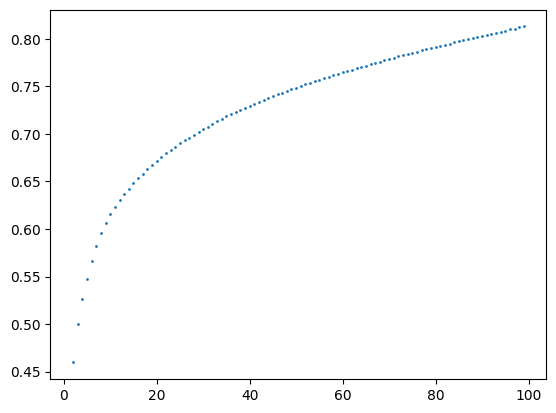

In [ ]:
plt.scatter(components, explained_variance, s=1)